In [138]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss 
import math
from collections import Counter

The dataset used in this notebook can be found at https://mushroom.mathematik.uni-marburg.de/files/.

In [139]:
# Reading in the dataset
df = pd.read_csv("../data/secondary_data_generated.csv")

# Cleaning

In [140]:
df.head()

,class;cap-diameter;cap-shape;cap-surface;cap-color;does-bruise-or-bleed;gill-attachment;gill-spacing;gill-color;stem-height;stem-width;stem-root;stem-surface;stem-color;veil-type;veil-color;has-ring;ring-type;spore-print-color;habitat;season
0,p;15.26;x;g;o;f;e;;w;16.95;17.09;s;y;w;u;w;t;g...
1,p;16.6;x;g;o;f;e;;w;17.99;18.19;s;y;w;u;w;t;g;...
2,p;14.07;x;g;o;f;e;;w;17.8;17.74;s;y;w;u;w;t;g;...
3,p;14.17;f;h;e;f;e;;w;15.77;15.98;s;y;w;u;w;t;p...
4,p;14.64;x;h;o;f;e;;w;16.53;17.2;s;y;w;u;w;t;p;...


In [141]:
# Splitting columns
df = df.iloc[:, 0].str.split(';', expand = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,p,15.26,x,g,o,f,e,,w,16.95,...,s,y,w,u,w,t,g,,d,w
1,p,16.6,x,g,o,f,e,,w,17.99,...,s,y,w,u,w,t,g,,d,u
2,p,14.07,x,g,o,f,e,,w,17.8,...,s,y,w,u,w,t,g,,d,w
3,p,14.17,f,h,e,f,e,,w,15.77,...,s,y,w,u,w,t,p,,d,w
4,p,14.64,x,h,o,f,e,,w,16.53,...,s,y,w,u,w,t,p,,d,w


In [142]:
# Changing column names to match those specified in the data dictionary
df.columns = ['class', 'cap_diameter', 'cap_shape', 'cap_surface', 'cap_color', 'does_bruise_or_bleed', 
              'gill_attachment', 'gill_spacing', 'gill_color', 'stem_height', 'stem_width', 'stem_root',
             'stem_surface', 'stem_color', 'veil_type', 'veil_color', 'has_ring', 'ring_type', 'spore_print_color',
             'habitat', 'season']

In [143]:
# Checking for null values
df.isnull().sum()

class                   0
cap_diameter            0
cap_shape               0
cap_surface             0
cap_color               0
does_bruise_or_bleed    0
gill_attachment         0
gill_spacing            0
gill_color              0
stem_height             0
stem_width              0
stem_root               0
stem_surface            0
stem_color              0
veil_type               0
veil_color              0
has_ring                0
ring_type               0
spore_print_color       0
habitat                 0
season                  0
dtype: int64

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   class                 61069 non-null  object
 1   cap_diameter          61069 non-null  object
 2   cap_shape             61069 non-null  object
 3   cap_surface           61069 non-null  object
 4   cap_color             61069 non-null  object
 5   does_bruise_or_bleed  61069 non-null  object
 6   gill_attachment       61069 non-null  object
 7   gill_spacing          61069 non-null  object
 8   gill_color            61069 non-null  object
 9   stem_height           61069 non-null  object
 10  stem_width            61069 non-null  object
 11  stem_root             61069 non-null  object
 12  stem_surface          61069 non-null  object
 13  stem_color            61069 non-null  object
 14  veil_type             61069 non-null  object
 15  veil_color            61069 non-null

Excluding the target variable (class), there are 3 continuous variables and 17 categorical / nominal variables. As such, I'll be changing the types of the continuous variables from objects to floats.

In [145]:
# Separate columns for continuous and categorical variables 
cat_col = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'does_bruise_or_bleed', 'gill_attachment', 
           'gill_spacing', 'gill_color', 'stem_root', 'stem_surface', 'stem_color', 'veil_type', 'veil_color', 
           'has_ring', 'ring_type', 'spore_print_color', 'habitat', 'season']
cont_col = ['cap_diameter', 'stem_height', 'stem_width']

In [146]:
for col in cont_col:
    df[col] = pd.to_numeric(df[col])

In [147]:
# Converting target column (class) to numeric representation
df['class'] = df['class'].apply(lambda x: 1 if x == 'p' else 0)

# Exploratory Data Analysis

### Analyzing Column Distributions

I'll be analyzing continuous and categorical variable distributions separately.

In [148]:
# Evaluating distributions of each categorical variable via proportions per type
for col in cat_col:
    print(f'{df[col].value_counts(normalize = True)}\n')

1    0.554913
0    0.445087
Name: class, dtype: float64

x    0.441042
f    0.219489
s    0.117310
b    0.093239
o    0.056657
p    0.042542
c    0.029720
Name: cap_shape, dtype: float64

     0.231214
t    0.134209
s    0.124580
y    0.103833
h    0.081449
g    0.077355
d    0.072574
e    0.042313
k    0.037711
i    0.036434
w    0.035206
l    0.023121
Name: cap_surface, dtype: float64

n    0.396568
y    0.139891
w    0.125530
g    0.072377
e    0.066073
o    0.059867
r    0.029180
u    0.027985
p    0.027886
k    0.020944
b    0.020141
l    0.013558
Name: cap_color, dtype: float64

f    0.82659
t    0.17341
Name: does_bruise_or_bleed, dtype: float64

a    0.207929
d    0.167794
     0.161850
x    0.121387
p    0.098266
e    0.092486
s    0.092486
f    0.057803
Name: gill_attachment, dtype: float64

     0.410405
c    0.404624
d    0.127168
f    0.057803
Name: gill_spacing, dtype: float64

w    0.303280
n    0.157936
y    0.156315
p    0.097971
g    0.067432
f    0.057803
o    0.0476

**Observations**
- Relatively balanced classes between poisonous and edible mushrooms.
- Large majority of mushrooms have a convex (x) cap shape (44%).
- Cap surfaces have a majority category (23%) with no cap surface type specified. Upon further investigation into the study discussing this dataset, these cap surfaces are unknown. 
- Large majority of mushroom cap colors (39%) are brown (n).
- Most mushrooms don't bruise or bleed (82%).
- Gill attachments have a category (16%) with gill attachment type specified. Upon further investigation into the study discussing this dataset, these types are unknown. 
- The same will be done as above with cap surfaces and gill attachments for the unknown gill spacing type. These unknowns, alongside close gill spacings, constitute roughly 81% of the mushrooms in the dataset.
- Majority of gill colors (30%) are white.
- Majority of stem root shapes (84%) are unknown. A decision on whether or not to drop this variable entirely due to this will be made based on correlation evaluations performed later in this notebook.
- Majority of stem surfaces (62%) are of either dry or leathery nature.
- White and brown stem mushrooms constitute 66% of the mushrooms.
- A large majority of mushrooms (94%) have an unspecified veil type.
- A large majority of mushrooms (87%) have an unknown veil color.
- Most mushrooms don't have a ring (75%)
- Most mushrooms have an unknown spore print color (89%)
- A large majority of mushrooms grow in the woods (72%)
- Most mushrooms can be found / grown during autumn and winter seasons (87%)

Many of the categorical columns have unknown categories. While I may be able to build a high-performing model in regards to metrics (i.e. accuracy and sensitivity), it may be challenging to develop meaningful findings in a practical context without incorporating further domain knowledge for imputation purposes.

In [125]:
# Evaluating distributions of each continuous variable via statistics
for col in cont_col:
    print(f'{df[col].describe()}\n')

count    61069.000000
mean         6.733854
std          5.264845
min          0.380000
25%          3.480000
50%          5.860000
75%          8.540000
max         62.340000
Name: cap_diameter, dtype: float64

count    61069.000000
mean         6.581538
std          3.370017
min          0.000000
25%          4.640000
50%          5.950000
75%          7.740000
max         33.920000
Name: stem_height, dtype: float64

count    61069.000000
mean        12.149410
std         10.035955
min          0.000000
25%          5.210000
50%         10.190000
75%         16.570000
max        103.910000
Name: stem_width, dtype: float64



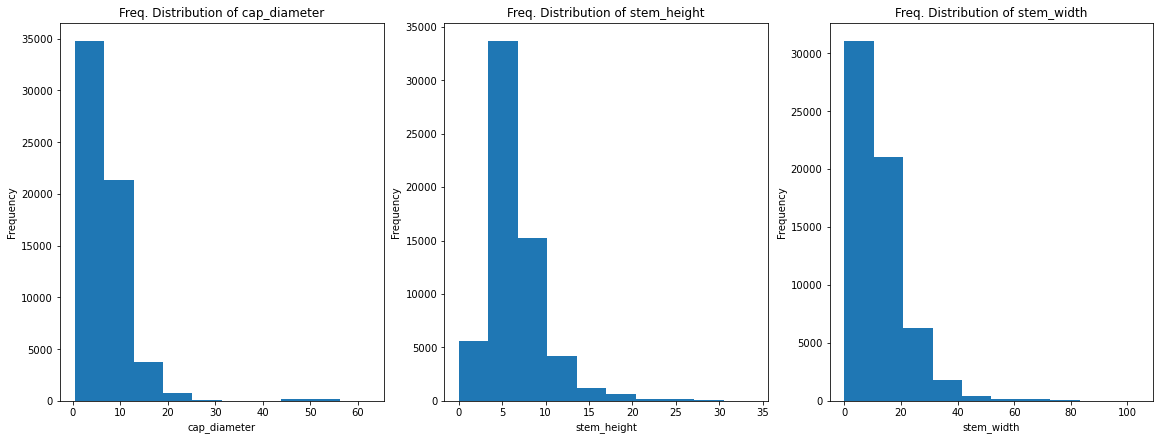

In [126]:
# Evaluating distributions of each continuous variable via histograms
fig, ax = plt.subplots(figsize = (16, 6), nrows = 1, ncols = 3, constrained_layout = True)
for i, col in enumerate(cont_col):
    ax[i].hist(df[col])
    ax[i].set_title(f'Freq. Distribution of {col}')
    ax[i].set_ylabel('Frequency')
    ax[i].set_xlabel(f'{col}')

**Observations**
- There are some outliers for cap diameters, ranging from roughly 45-55 cm. The cap diameter distribution is right skewed as well, with a vast majority of mushrooms having between 0-10 cm cap diameters.
- The stem height distribution is very roughly normally distributed
- The stem width distribution is right skewed as well, with outliers present (103 mm). 
- Continuous variables are on different scales (cap diameter and stem height are measured in cm, while stem width is measured in mm)

### Analyzing Correlations 

The goal here is to provide additional support to any findings developed from my classification and clustering models as well as identify any sources of multicollinearity.

In [127]:
# Evaluating correlations between continuous features via Pearson Coefficient
df.corr()

,class,cap_diameter,stem_height,stem_width
class,1.000000,-0.181139,-0.121593,-0.197368
cap_diameter,-0.181139,1.000000,0.422560,0.695330
stem_height,-0.121593,0.422560,1.000000,0.436117
stem_width,-0.197368,0.695330,0.436117,1.000000


It appears the stem width and cap diameter are strongly correlated (~70%).

In [128]:
# Evaluating correlations between continuous features and target (class) via Point Biserial Correlation
for col in cont_col:
    print(ss.pointbiserialr(df[col], df['class']))

PointbiserialrResult(correlation=-0.1811392638047386, pvalue=0.0)
PointbiserialrResult(correlation=-0.12159303061828186, pvalue=8.030231152082958e-200)
PointbiserialrResult(correlation=-0.19736751565538865, pvalue=0.0)


There appears to be minimal correlation between the cap diameter, stem height, and stem width with the edibility of the mushroom.

The code used below is based on https://www.kaggle.com/code/shakedzy/alone-in-the-woods-using-theil-s-u-for-survival/notebook.

In [129]:
# Evaluating correlations between categorical variables and target (class) via Uncertainty Coefficient (Theil's U)
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

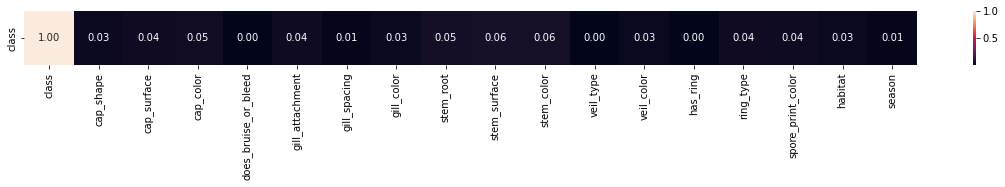

In [130]:
cat_df = df[cat_col]
theilu = pd.DataFrame(index = ['class'], columns = cat_df.columns)
for i in range(0, len(cat_df.columns)):
    theilu.loc[:, cat_df.columns[i]] = theil_u(cat_df['class'].tolist(), cat_df[cat_df.columns[i]].tolist())
plt.figure(figsize = (20,1))
sns.heatmap(theilu, annot = True, fmt = '.2f')
plt.show()

There doesn't appear to be any categorical variables that are strongly correlated with mushroom edibility. However, upon further research based on the notebook above, odor appears to be a significant indicator of mushroom edibility, with a 91% correlation. In addition, amongst odorless mushrooms, if it's spore color is not green, it's edible. If it's white, the results are unclear.

In [131]:
# Saving cleaned dataset
df.to_csv('../data/cleaned_data_1.csv')

# Summary of Findings 

- Many unknown types per categorical variable which deteriorates strength of interpretability
- Most mushrooms have shared characteristics (i.e. convex cape shape, brown, don’t bruise or bleed, white gill colors, dry/leathery stem surfaces, have white/brown stems, lack a ring, grow in the woods, mushrooms can be found / grown during autumn and winter seasons)
- Skewed distributions across many continuous variables with different scales, which will inform model selection process
- Multicollinearity between stem width and cap diameter
- Minimal correlation between both continuous and categorical variables vs. target (class)
- Odor appears to be a significant indicator of mushroom edibility
    - For odorless mushrooms, if it's spore color is not green, it's edible. If it's white, the results are unclear.